Enter the names of all group members in the cell below:

Cole Determan & Ben Berry

# PyTorch Fundamentals

See also: https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html

Learning Objectives:

* Gain experience with low-level PyTorch operations


## Calculating Gradients

In a previous exercise, we practiced calculating partial derivatives on the following example:

$$f(x,y) = \sqrt{x^2 + y^2}$$

$$\frac{\partial f}{\partial x} = \frac{x}{\sqrt{x^2 + y^2}}$$

$$\frac{\partial f}{\partial y} = \frac{y}{\sqrt{x^2 + y^2}}$$

### Question
Take a second to calcuate the following by hand:

*   $\displaystyle f(3, 4) = ??$
    

*   $\displaystyle \frac{\partial f(3, 4)}{\partial x} = ??$
    
   
*   $\displaystyle \frac{\partial f(3, 4)}{\partial y} = ??$
   


5, 3/5, 4/5

At its core, PyTorch is a library for representing mathematical operations as graphical structures and automating the process of computing partial derivatives.  We can use PyTorch to write numpy-style mathematical operations:


In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE" 
os.environ["OMP_NUM_THREADS"] = "1"       
import torch
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return torch.sqrt(x**2 + y**2)
    
x = torch.tensor(3.0)
y = torch.tensor(4.0)

print(f(x, y))

tensor(5.)


More interestingly, we can specify that PyTorch should track the partial derivatives of our calculations with respect to some tensors:

In [2]:
x = torch.tensor(3.0, requires_grad=True)
y = torch.tensor(4.0, requires_grad=True)

fxy = f(x, y) # Evaluate the function.

fxy.backward() # Calculate the partial derivatives.

print(f"f(3, 4) = {fxy:.5}")
print(f"df(3, 4)/dx = {x.grad:.5}")
print(f"df(3, 4)/dy = {y.grad:.5}")

f(3, 4) = 5.0
df(3, 4)/dx = 0.6
df(3, 4)/dy = 0.8


Once we have the partial derivatives, we can minimize our function using gradient descent.  Use the cell below to find the x and y that minimize $f(x,y) = \sqrt{x^2 + y^2}$.  Adjust the learning rate and the number of iterations (*not* the starting x and y values) until the code converges to something close to the minimum value for the function.

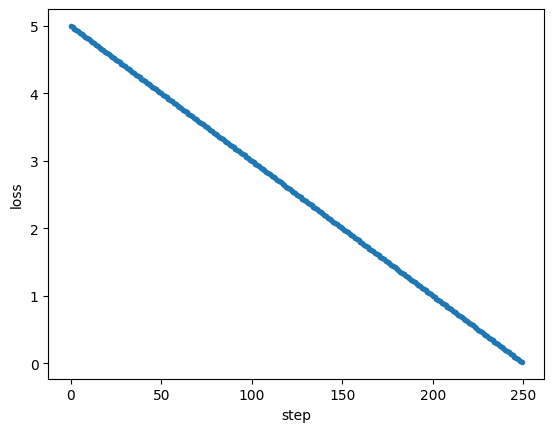


Final estimate: 
f(-4.8177e-06, -6.4243e-06) = 8.03e-06


In [3]:
learning_rate = 0.02  # ADJUST THIS!
iterations = 250       # AND/OR THIS!

x = torch.tensor(3.0, requires_grad=True)
y = torch.tensor(4.0, requires_grad=True)

losses = []

for iteration in range(iterations):
    fxy = f(x, y)

    losses.append(fxy.item())
    
    # One step of gradient descent...
    fxy.backward()
    x.data = x.data - learning_rate * x.grad
    y.data = y.data - learning_rate * y.grad
    
    # By default, the gradients will continue to accumulate.
    # We need to zero it out each iteration to get a fresh result.
    x.grad.zero_()
    y.grad.zero_()

plt.plot(losses, '.-')
plt.xlabel("step")
plt.ylabel("loss")
plt.show()
print("\nFinal estimate: ")
fxy = f(x, y)
print(f"f({x:.5}, {y:.5}) = {fxy:.5}")

    

### Questions:

* What learning rate and iteration count did you settle on? 
* Where does this function have its minimum? (Note that this is a case where we don't *need* to use gradient descent to find the solution. You should be able to determine the minimum value without executing the code above.)

We settled on 0.02 learning rate and 250 learning count. The minimum is at step 250.

## Exercise

Use gradient descent to minimize the following function:

$$f(x, y) = \sin(5x + 3) + x^2 + \cos(2y + 1) +y^2$$

It looks like this:


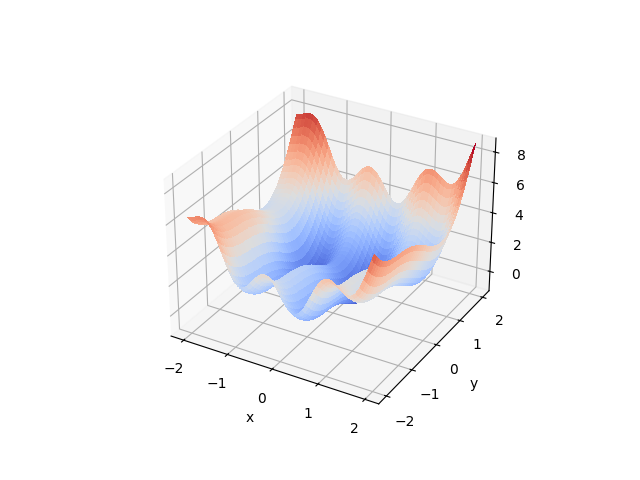

In [4]:
import matplotlib.pyplot as plt
%matplotlib widget
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
x, y = np.meshgrid(x, y)
z = np.sin(5 * x + 3) + x**2 + np.cos(2 * y + 1) + y**2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap=plt.cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


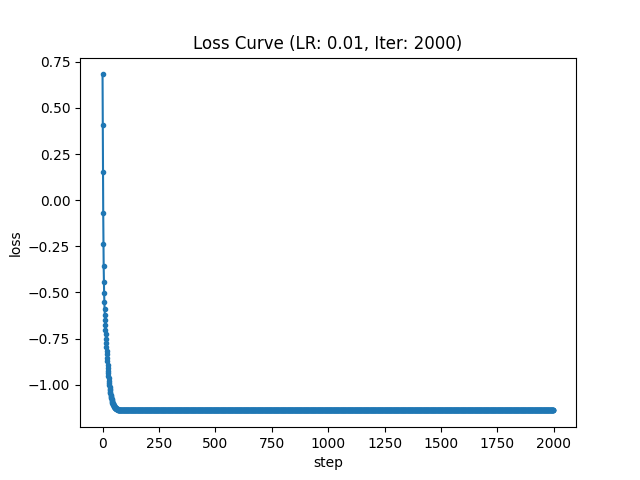


Final estimate: 
f(0.31705, 0.69003) = -1.139


In [9]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def f2(x, y):
    return torch.sin(5*x + 3) + x**2 + torch.cos(2*y + 1) + y**2

learning_rate = 0.01
iterations = 1000

x = torch.tensor(0.0, requires_grad=True)  
y = torch.tensor(0.0, requires_grad=True)  

losses = []

for iteration in range(iterations):
    fxy = f2(x, y)  
    
    losses.append(fxy.item())
    
    fxy.backward()
    
    with torch.no_grad():
        x.data -= learning_rate * x.grad
        y.data -= learning_rate * y.grad
    
    x.grad.zero_()
    y.grad.zero_()

plt.figure()
plt.plot(losses, '.-')
plt.xlabel("step")
plt.ylabel("loss")
plt.title(f"Loss Curve (LR: {learning_rate}, Iter: {iterations})")
plt.show()

print("\nFinal estimate: ")
final_fxy = f2(x, y)
print(f"f({x.item():.5}, {y.item():.5}) = {final_fxy.item():.5}")

In [10]:
from numpy.testing import assert_almost_equal
assert_almost_equal(x.data, .317, decimal=3)
assert_almost_equal(y.data, .690, decimal=3)